# Analysis of the *Licence* Dataset
### Question 1: *Using a variable of the dataset, how can we distinguish each elevator ?*

At first, I inspected each dataframe manually:

In [1]:
import pandas as pd
altered = pd.read_json("../data/raw/altered.json")
altered.head(1)

,originating service request number,Alteration Customer,Summary,Elevating Devices Number,Inspection number,Alteration Location,Alteration Type,Status of Alteration Request,Alteration contractor name,Billing Customer
0,782682,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,Minor B Alteration Machine Guarding,8,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Minor B Alteration,Passed,NaN,THYSSENKRUPP ELEVATOR (CANADA) LTD


In [2]:
incident = pd.read_json("../data/raw/incident.json")
incident.head(1)

,Incident Number,Creation Date,Fatal Injury Victim,Concussion Intracranial Inju,Burns Severe,Burns Minor,Whiplash,Spinal Injury,Amputation,Injury Leading Deafness,...,No Injury,elevating devices number,Specific Root Cause,Reported occurrence narrative,Time of Occurrence,Summarized detail of Inspection and tests,Inspector's Conclusion,Incident Summary,Task Number,release
0,518574,14-Jan-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22202,None,Elevator-Flood on 13th floor ran down the stai...,2:00:00 PM,None,None,ED-Near Miss,3200103,yes


In [3]:
inspection = pd.read_csv("../data/raw/inspection.csv")
inspection.head(1)

,originatingservicerequestnumber,InspectionCustomer,ElevatingDevicesNumber,InspectionNumber,InspectionLocation,InspectionType,Earliest_INSPECTION_Date,Latest_INSPECTION_Date,InspectionOutcome
0,55620,LANDSCAPE COURT APARTMENTS LTD,9948,3157237,10 WYCOMBE RD DOWNSVIEW M3M 2W7 ON CA,ED-Followup Inspection,1/10/2011,1/10/2011,Passed


In [4]:
installed = pd.read_json("../data/raw/installed.json")
installed.head(1)

,Elevating devices number,Owner Name,Owner Address,Owner Account Number,Device Class,Device Type,DeviceStatus,Location of Device,under review
0,8,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N


In [5]:
license = pd.read_csv("../data/raw/licence.csv")
license.head(1)

,ElevatingDevicesNumber,LocationoftheElevatingDevice,ElevatingDevicesLicenseNumber,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT
0,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,EDLIC-000010,ACTIVE,28-Apr-17,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,data redacted,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,data redacted


In [6]:
order = pd.read_csv("../data/raw/order.csv")
order.head(1)

,ElevatingDevicesNumber,TSSAStandardOrderNumber,RegulationReference,ClauseNumber,ClauseText,DIRECTIVE,Inspectionsadditionalinformation,RISKSCORE,Inspection_type,DateofIssue,StatusofInspectionOrder,inspectionnumber,DaystoComply,ComplianceDate,customerorderedtocomply
0,10,NaN,NaN,NaN,NaN,NaN,Top of Car and Hoistway -other**make the car t...,22.0,ED-Followup Inspection,3/5/2012 14:08,RESOLVED,3747366,1.0,3/6/2012,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...


Already it was clear that the columns "Elevating Devices Number", "elevating devices number" "ElevatingDevicesNumber", "Elevating devices number" were are refering to the same thing.

Now for the automated approach:

In [7]:
from functools import reduce
import numpy as np
for df in [altered, incident, inspection, installed, license, order]:
    df.columns = df.columns.str.upper()
    df.columns = df.columns.str.replace(' ', '')
reduce(np.intersect1d, (altered.columns, incident.columns, inspection.columns, installed.columns, license.columns, order.columns))

array(['ELEVATINGDEVICESNUMBER'], dtype=object)

### Conclusion: *We can fairly determine that the following columns refer to the same variable:* "Elevating Devices Number", "elevating devices number" "ElevatingDevicesNumber", "Elevating devices number"
- - - 

### Question 2: *Where are the majority of elevators located ?*

In [8]:
#Add new columns for State/Province and Country
license["State/Province"] = license["LOCATIONOFTHEELEVATINGDEVICE"].str.slice(-5,-3)
license["Country"] = license["LOCATIONOFTHEELEVATINGDEVICE"].str.slice(-2)
license[["State/Province","Country"]]

,State/Province,Country
0,ON,CA
1,ON,CA
2,ON,CA
3,ON,CA
4,ON,CA
...,...,...
45378,ON,CA
45379,ON,CA
45380,ON,CA
45381,ON,CA


In [9]:
license.groupby("State/Province").count()

,ELEVATINGDEVICESNUMBER,LOCATIONOFTHEELEVATINGDEVICE,ELEVATINGDEVICESLICENSENUMBER,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT,Country
State/Province,,,,,,,,,,,,
ON,45340,45340,45340,45340,45340,45340,45340,45340,45340,45340,45340,45340


### Conclusion: *Given that all ElevatingDevices are from "ON, CA", we can say with great confidence that this is where the majority are located*
- - -

### Question 3: *How should we filter the “LICENSE STATUS” variable?*

In [10]:
license.groupby("LICENSESTATUS").count()

,ELEVATINGDEVICESNUMBER,LOCATIONOFTHEELEVATINGDEVICE,ELEVATINGDEVICESLICENSENUMBER,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT,State/Province,Country
LICENSESTATUS,,,,,,,,,,,,
ACTIVE,42665,42625,42665,42665,42665,42665,42665,42665,42665,42665,42625,42625
BY REQUEST,337,337,337,337,337,337,337,337,337,337,337,337
CANCELLED,3,3,3,3,3,3,3,3,3,3,3,3
CANCELLED_BY_CUST_REQ,6,6,6,6,6,6,6,6,6,6,6,6
CANCELLED_NOT_RENEWED,1163,1161,1163,1163,1163,1163,1163,1163,1163,1163,1161,1161
ENTERED,4,4,4,4,4,4,4,4,4,4,4,4
EXPIRED,68,68,68,68,68,68,68,68,68,68,68,68
HOLD_TSD,24,24,24,24,24,24,24,24,24,24,24,24
PENDING_RENEWAL,632,631,632,632,632,632,632,632,632,632,631,631


With the above output, we can see that most of the data concern licenses that have an ACTIVE status. A possible filter to apply would be to remove anything that isn't ACTIVE.

In [11]:
activeLicense = license[license["LICENSESTATUS"] == "ACTIVE"]
activeLicense.head()

,ELEVATINGDEVICESNUMBER,LOCATIONOFTHEELEVATINGDEVICE,ELEVATINGDEVICESLICENSENUMBER,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT,State/Province,Country
0,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,EDLIC-000010,ACTIVE,28-Apr-17,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,data redacted,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,data redacted,ON,CA
4,1009,404 MAIN ST WOODSTOCK N4S 7X5 ON CA,EDLIC-001009,ACTIVE,15-Jul-17,AGRIBRANDS PURINA CANADA INC,data redacted,404 MAIN ST PO BOX 250 WOODSTOCK ON N4S 7X5 CA,AGRIBRANDS PURINA CANADA INC,"404 MAIN ST PO BOX 250 WOODSTOCK, ON, N4S 7X5, CA",data redacted,ON,CA
7,10145,45 SECOND ST E CORNWALL K6H 1V5 ON CA,EDLIC-010145,ACTIVE,15-Mar-17,CORNWALL PUBLIC LIBRARY,data redacted,45 SECOND ST E P.O.BOX 939 CORNWALL ON K6H 5V1 CA,CORNWALL PUBLIC LIBRARY,"45 SECOND ST E P.O.BOX 939 CORNWALL, ON, K6H 5...",data redacted,ON,CA
8,1018,150 SIMCOE ST LONDON N6A 4M3 ON CA,EDLIC-001018,ACTIVE,15-Oct-17,LABATT LONDON -LONDON BREWERY,data redacted,150 SIMCOE ST PO BOX 5050 STN B LONDON ON N6A ...,LABATT LONDON -LONDON BREWERY,"150 SIMCOE ST PO BOX 5050 STN B LONDON, ON, N6...",data redacted,ON,CA
9,1019,150 SIMCOE ST LONDON N6A 4M3 ON CA,EDLIC-001019,ACTIVE,15-Oct-17,LABATT LONDON -LONDON BREWERY,data redacted,150 SIMCOE ST PO BOX 5050 STN B LONDON ON N6A ...,LABATT LONDON -LONDON BREWERY,"150 SIMCOE ST PO BOX 5050 STN B LONDON, ON, N6...",data redacted,ON,CA


### Conclusion: *We have now filtered the licenses to keep only those that are ACTIVE. Of course, what would be the best filter to apply is debatable depending on the context and the intended purpose. Other possibilities would have been to mark everything that is not active as INACTIVE, to combine similar statuses (e.g. TERMINATED and TERMINATED DECEASED), etc.*
- - -

### Question 4: *Is the variable you chose in the first question unique ? How can we verify this assumption ?*

In [12]:
amountOfUnique = len(license["ELEVATINGDEVICESNUMBER"].unique())
total = license["ELEVATINGDEVICESNUMBER"].count()
amountOfUnique == total

True

### Conclusion: *Given that we have exactly the same amount of license and unique ElevatingDevicesNumber, we can confirm that this variable is indeed unique.*
- - -

### Question 5: *The “LICENCE EXPIRY DATE” variable can be used to plot a time series. We want to know the count of expiration by month.*

<AxesSubplot:xlabel='LICENSEEXPIRYMONTH'>

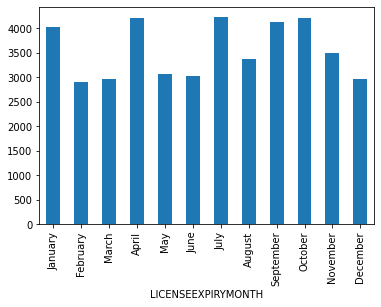

In [13]:
# license = license[license["LICENSEEXPIRYDATE"] != 0]
# license["LICENSEEXPIRYDATE"] = pd.to_datetime(license["LICENSEEXPIRYDATE"], format = "%d-%b-%y")
# license["LICENSEEXPIRYMONTH"] = license["LICENSEEXPIRYDATE"].dt.month_name()
# license["LICENSEEXPIRYMONTH"] = pd.Categorical(license["LICENSEEXPIRYMONTH"], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
# licenceExpiryPerMonth = license.groupby(license["LICENSEEXPIRYMONTH"]).count()
# licenceExpiryPerMonth["LICENSEEXPIRYDATE"].plot(kind="bar")

activeLicense = activeLicense[activeLicense["LICENSEEXPIRYDATE"] != 0]
activeLicense["LICENSEEXPIRYDATE"] = pd.to_datetime(activeLicense["LICENSEEXPIRYDATE"], format = "%d-%b-%y")
activeLicense["LICENSEEXPIRYMONTH"] = activeLicense["LICENSEEXPIRYDATE"].dt.month_name()
activeLicense["LICENSEEXPIRYMONTH"] = pd.Categorical(activeLicense["LICENSEEXPIRYMONTH"], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
licenceExpiryPerMonth = activeLicense.groupby(activeLicense["LICENSEEXPIRYMONTH"]).count()
licenceExpiryPerMonth["LICENSEEXPIRYDATE"].plot(kind="bar")



### Conclusion: *We can now see the amount of expiring licenses per month. We see that throughout the years, there is a pattern of spikes at the beginning of each trimester. Although I had doubts at first on the utility of combining all years together rather than have the count for a specific year, I can see the benefit of this approach for identifying patterns.*
- - -

### Question 6: *Use the “LICENSE EXPIRY DATE” variable to make a table of the count of expiration by year-month (2015-01 , 2015-02 etc). Add a column to show the “2015-01” as January 2015. Show only Year/Months with more than 5 occurrences.*

Continuing from what was done in the last question, we will add a new column LICENSEEXPIRYYEAR.

<AxesSubplot:xlabel='YEARMONTH'>

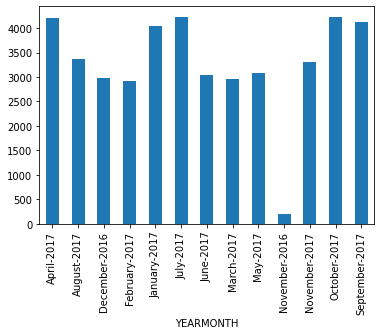

In [14]:
activeLicense["LICENSEEXPIRYYEAR"] = activeLicense["LICENSEEXPIRYDATE"].dt.year
activeLicense['YEARMONTH'] = activeLicense["LICENSEEXPIRYMONTH"].astype(str).str.cat(activeLicense["LICENSEEXPIRYYEAR"].astype(str), sep='-')
licenceExpiryPerYearMonth = activeLicense.groupby(activeLicense["YEARMONTH"]).count()
licenceExpiryPerYearMonth = licenceExpiryPerYearMonth[licenceExpiryPerYearMonth["LICENSEEXPIRYYEAR"] > 5]
licenceExpiryPerYearMonth["LICENSEEXPIRYYEAR"].plot(kind="bar")

After getting this beautiful output and rereading the requirements, I did this:

In [15]:
counts = activeLicense["YEARMONTH"].value_counts()
counts = counts[counts > 5]
dates = counts.index
counts.index = pd.to_datetime(counts.index)
table = pd.DataFrame({'YEAR': counts.index.year, 'MONTH':  counts.index.month, 'OCCURENCE': counts.values, 'DATE': dates})
table = table.sort_values(by='YEAR')
table

,YEAR,MONTH,OCCURENCE,DATE
9,2016,12,2973,December-2016
12,2016,11,199,November-2016
0,2017,7,4235,July-2017
1,2017,10,4220,October-2017
2,2017,4,4208,April-2017
3,2017,9,4131,September-2017
4,2017,1,4033,January-2017
5,2017,8,3375,August-2017
6,2017,11,3305,November-2017
7,2017,5,3073,May-2017


I didn't really like the presentation of the previous table, so I would propose an alternate version:

In [16]:
table2 = pd.DataFrame({'OCCURENCE': counts.values, 'MONTH':  counts.index.month, 'YEAR': counts.index.year}, index=dates)
table2 = table2.sort_values(by='YEAR')
table2

,OCCURENCE,MONTH,YEAR
December-2016,2973,12,2016
November-2016,199,11,2016
July-2017,4235,7,2017
October-2017,4220,10,2017
April-2017,4208,4,2017
September-2017,4131,9,2017
January-2017,4033,1,2017
August-2017,3375,8,2017
November-2017,3305,11,2017
May-2017,3073,5,2017


After some analysis, I realise that a previous manipulation affects the output we get:

```license = license[license["LICENSESTATUS"] == "ACTIVE"]```

Realising that it's now difficult to test with the unaltered dataset, I did some refactoring so I have references to both the filtered and unfiltered set. The previous code before now features the ```activeLicense``` variable, but it was not the case at first.

If we use the unfiltered set, we get the following:

In [17]:
# Do the same manipulations as the ones for activeLicense
license = license[license["LICENSEEXPIRYDATE"] != 0]
license["LICENSEEXPIRYDATE"] = pd.to_datetime(license["LICENSEEXPIRYDATE"], format = "%d-%b-%y")
license["LICENSEEXPIRYMONTH"] = license["LICENSEEXPIRYDATE"].dt.month_name()
license["LICENSEEXPIRYMONTH"] = pd.Categorical(license["LICENSEEXPIRYMONTH"], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
license["LICENSEEXPIRYYEAR"] = license["LICENSEEXPIRYDATE"].dt.year
license['YEARMONTH'] = license["LICENSEEXPIRYMONTH"].astype(str).str.cat(license["LICENSEEXPIRYYEAR"].astype(str), sep='-')

counts = license["YEARMONTH"].value_counts()
counts = counts[counts > 5]
dates = counts.index
counts.index = pd.to_datetime(counts.index)
table = pd.DataFrame({'YEAR': counts.index.year, 'MONTH':  counts.index.month, 'OCCURENCE': counts.values, 'DATE': dates})
table = table.sort_values(by='YEAR')
table

,YEAR,MONTH,OCCURENCE,DATE
101,1993,9,7,September-1993
103,1993,10,6,October-1993
115,1993,11,6,November-1993
121,1994,4,6,April-1994
86,1996,4,7,April-1996
...,...,...,...,...
8,2017,6,3111,June-2017
10,2017,3,3007,March-2017
11,2017,2,2940,February-2017
5,2017,8,3545,August-2017


As we can see, by including the inactive licenses we get something much closer to the example provided.

The alternate version:

In [18]:
table2 = pd.DataFrame({'OCCURENCE': counts.values, 'MONTH':  counts.index.month, 'YEAR': counts.index.year}, index=dates)
table2 = table2.sort_values(by='YEAR')
table2

,OCCURENCE,MONTH,YEAR
September-1993,7,9,1993
October-1993,6,10,1993
November-1993,6,11,1993
April-1994,6,4,1994
April-1996,7,4,1996
...,...,...,...
June-2017,3111,6,2017
March-2017,3007,3,2017
February-2017,2940,2,2017
August-2017,3545,8,2017


### Conclusion: *The required table was produced.* 

Note: *At this point I'm really wondering if it is useful to include the inactive licenses or not. This gives us data with a broader timespan, but also makes it so we have entries with very low OCCURENCE values. Would this be considered as noise or beneficial?*
- - -